## Feature Engineering and Remodeling  

#### To Do:

1. Perform the required Feature Engineering (Feature Selection using RFE, Feature Transformation, etc.)

2. Rebuild the models (Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc.

3. Compare the model (With Feature Engineering) Performance with previous model (Without Feature Engineering) 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(10000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

# 2. Cleaning the Data

In [5]:
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

# ____________________________
for column in df:
    if column=="Holding_Policy_Type":
        pass
    else:
        if df[column].isnull().any():
            if(column in cateogry_columns):
                df[column]=df[column].fillna(df[column].mode()[0])
            else:
                df[column]=df[column].fillna(df[column].mean())

In [6]:
df['Holding_Policy_Type'].value_counts()
df['Holding_Policy_Type']=df['Holding_Policy_Type'].fillna(3.0)

In [7]:
df=df.replace({'Holding_Policy_Duration':{'NaN':"14+"}},regex=True)
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].str.replace("+","")
df['Holding_Policy_Duration'].astype(str).astype(int)

<ipython-input-7-fc24cfc350b3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].str.replace("+","")


0       14
1       10
2        3
3        1
4       14
        ..
9995    14
9996     6
9997     8
9998    14
9999    14
Name: Holding_Policy_Duration, Length: 10000, dtype: int32

In [8]:
df=df.replace({'Holding_Policy_Duration':{'NaN':"14+"}},regex=True)
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].str.replace("+","")
df['Holding_Policy_Duration'].astype(str).astype(int)

<ipython-input-8-fc24cfc350b3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].str.replace("+","")


0       14
1       10
2        3
3        1
4       14
        ..
9995    14
9996     6
9997     8
9998    14
9999    14
Name: Holding_Policy_Duration, Length: 10000, dtype: int32

In [9]:
print('Accomodation_Type : ',df['Accomodation_Type'].unique())
print('Reco_Insurance_Type : ',df['Reco_Insurance_Type'].unique())
print('Is_Spouse : ',df['Is_Spouse'].unique())

Accomodation_Type :  ['Owned' 'Rented']
Reco_Insurance_Type :  ['Individual' 'Joint']
Is_Spouse :  ['No' 'Yes']


In [10]:
df['Accomodation_Type'].replace(('Owned','Rented'), (1, 0), inplace=True)
df['Reco_Insurance_Type'].replace(('Individual','Joint'), (1, 0), inplace=True)
df['Is_Spouse'].replace(('Yes', 'No'), (1, 0), inplace=True)

In [11]:
df

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,1,1,36,36,0,X1,14,2.0,16,13320.0,0
1,33499,33500,C3,2955,1,1,66,66,0,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,0,1,24,24,0,X1,3,1.0,16,7310.0,0
3,33032,33033,C26,772,0,1,75,75,0,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,1,0,59,58,1,X1,14,4.0,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,C3,13,1,0,47,40,1,X5,14,3.0,19,27840.0,1
9996,35448,35449,C5,1477,0,1,34,34,0,X1,6,1.0,4,10560.0,0
9997,47253,47254,C1,2357,1,1,64,64,0,X1,8,2.0,19,14716.0,0
9998,42544,42545,C1,1443,0,1,53,53,0,X5,14,3.0,13,11664.0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  int64  
 5   Reco_Insurance_Type      10000 non-null  int64  
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  object 
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [13]:
df.select_dtypes(include=['object']).columns.tolist()

['City_Code', 'Health Indicator', 'Holding_Policy_Duration']

In [14]:
num_col = df.select_dtypes(exclude=['object'])
num_col

,Unnamed: 0,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,64,1,1,36,36,0,2.0,16,13320.0,0
1,33499,33500,2955,1,1,66,66,0,1.0,19,16152.0,0
2,7997,7998,1542,0,1,24,24,0,1.0,16,7310.0,0
3,33032,33033,772,0,1,75,75,0,3.0,16,15792.0,0
4,30516,30517,1510,1,0,59,58,1,4.0,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,13,1,0,47,40,1,3.0,19,27840.0,1
9996,35448,35449,1477,0,1,34,34,0,1.0,4,10560.0,0
9997,47253,47254,2357,1,1,64,64,0,2.0,19,14716.0,0
9998,42544,42545,1443,0,1,53,53,0,3.0,13,11664.0,0


In [15]:
cat_col = df.select_dtypes(include=['object'])
cat_col

,City_Code,Health Indicator,Holding_Policy_Duration
0,C3,X1,14
1,C3,X6,10
2,C1,X1,3
3,C26,X1,1
4,C2,X1,14
...,...,...,...
9995,C3,X5,14
9996,C5,X1,6
9997,C1,X1,8
9998,C1,X5,14


In [16]:
cat_col

,City_Code,Health Indicator,Holding_Policy_Duration
0,C3,X1,14
1,C3,X6,10
2,C1,X1,3
3,C26,X1,1
4,C2,X1,14
...,...,...,...
9995,C3,X5,14
9996,C5,X1,6
9997,C1,X1,8
9998,C1,X5,14


In [17]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.shape


(10000, 14)

In [18]:
cat_col['City_Code'].replace(('C3','C1','C26','C2','C17','C4' ,'C16', 'C9','C23','C21','C6','C7','C11','C22','C15','C13', 'C8','C35','C29','C33','C10','C12', 'C19', 'C5' ,'C18','C14','C24','C27','C20','C34','C36','C25','C28','C32','C30','C31'), (3,1,26,2,17,4,16,9,23,21,6,7,11,22,15,13,8,35,29,33,10,12,19,5,18,14,24,27,20,34,36,25,28,32,30,31), inplace=True)
cat_col['Health Indicator'].replace(('X1','X6','X4','X2','X3','X5','X8','X7','X9'), (1,6,4,2,3,5,8,7,9), inplace=True)
cat_col['Holding_Policy_Duration'].replace(('14','10','3','1','7','13','9','8','2','4','5','11','6','12'), (14,10,3,1,7,13,9,8,2,4,5,11,6,12), inplace=True)


C:\Users\dell\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [19]:
df_encoded = pd.concat([num_col, cat_col], axis=1)
df_encoded

,Unnamed: 0,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code,Health Indicator,Holding_Policy_Duration
0,27385,27386,64,1,1,36,36,0,2.0,16,13320.0,0,3,1,14
1,33499,33500,2955,1,1,66,66,0,1.0,19,16152.0,0,3,6,10
2,7997,7998,1542,0,1,24,24,0,1.0,16,7310.0,0,1,1,3
3,33032,33033,772,0,1,75,75,0,3.0,16,15792.0,0,26,1,1
4,30516,30517,1510,1,0,59,58,1,4.0,17,23673.0,0,2,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,13,1,0,47,40,1,3.0,19,27840.0,1,3,5,14
9996,35448,35449,1477,0,1,34,34,0,1.0,4,10560.0,0,5,1,6
9997,47253,47254,2357,1,1,64,64,0,2.0,19,14716.0,0,1,1,8
9998,42544,42545,1443,0,1,53,53,0,3.0,13,11664.0,0,1,5,14


>Observe that 24.59% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.<br>
<b> To Do:</b>

- Read about Oversampling and Undersampling.
- Perform undersampling.

In [20]:
X = df_encoded.drop('Response',axis=1)
y = df_encoded['Response']

In [21]:
print('shape of X : ', X.shape)
print('shape of y : ', y.shape)

shape of X :  (10000, 14)
shape of y :  (10000,)


## Feature Engineering

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
1,ID,7.604606e+10
0,Unnamed: 0,7.604156e+10
5,Upper_Age,1.801190e+01
6,Lower_Age,1.350146e+01
4,Reco_Insurance_Type,9.135569e+00
7,Is_Spouse,6.066506e+00
10,Reco_Policy_Premium,5.371972e+00
3,Accomodation_Type,1.244258e+00
8,Holding_Policy_Type,1.145528e+00
13,Holding_Policy_Duration,1.131546e+00


In [23]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
lr = sm.OLS(y, X_sm).fit()
np.round(lr.pvalues, 3)

const                      0.000
Unnamed: 0                 0.000
ID                         0.000
Region_Code                0.936
Accomodation_Type          0.227
Reco_Insurance_Type        0.019
Upper_Age                  0.220
Lower_Age                  0.508
Is_Spouse                  0.058
Holding_Policy_Type        0.770
Reco_Policy_Cat            0.000
Reco_Policy_Premium        0.053
City_Code                  0.664
Health Indicator           0.773
Holding_Policy_Duration    0.603
dtype: float64

In [24]:
X = X.drop('Holding_Policy_Type',1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
X_sm = sm.add_constant(X)
lr = sm.OLS(y, X_sm).fit()
print(np.round(lr.pvalues, 3))
print('#'*20)
print(vif_data)

const                      0.000
Unnamed: 0                 0.000
ID                         0.000
Region_Code                0.931
Accomodation_Type          0.221
Reco_Insurance_Type        0.019
Upper_Age                  0.220
Lower_Age                  0.507
Is_Spouse                  0.058
Reco_Policy_Cat            0.000
Reco_Policy_Premium        0.053
City_Code                  0.674
Health Indicator           0.781
Holding_Policy_Duration    0.511
dtype: float64
####################
                    feature           VIF
1                        ID  7.013860e+10
0                Unnamed: 0  7.013478e+10
5                 Upper_Age  1.801189e+01
6                 Lower_Age  1.350118e+01
4       Reco_Insurance_Type  9.135393e+00
7                 Is_Spouse  6.062713e+00
9       Reco_Policy_Premium  5.371480e+00
3         Accomodation_Type  1.241276e+00
10                City_Code  1.039155e+00
8           Reco_Policy_Cat  1.018613e+00
2               Region_Code  1.013359e+0

In [25]:
X = X.drop('Is_Spouse',1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
X_sm = sm.add_constant(X)
lr = sm.OLS(y, X_sm).fit()
print(np.round(lr.pvalues, 3))
print('#'*20)
print(vif_data)

const                      0.000
Unnamed: 0                 0.000
ID                         0.000
Region_Code                0.940
Accomodation_Type          0.250
Reco_Insurance_Type        0.156
Upper_Age                  0.031
Lower_Age                  0.080
Reco_Policy_Cat            0.000
Reco_Policy_Premium        0.052
City_Code                  0.664
Health Indicator           0.762
Holding_Policy_Duration    0.526
dtype: float64
####################
                    feature           VIF
1                        ID  3.684137e+10
0                Unnamed: 0  3.683941e+10
5                 Upper_Age  1.515059e+01
6                 Lower_Age  1.054509e+01
8       Reco_Policy_Premium  5.371422e+00
4       Reco_Insurance_Type  2.487490e+00
3         Accomodation_Type  1.239297e+00
9                 City_Code  1.039101e+00
7           Reco_Policy_Cat  1.018454e+00
2               Region_Code  1.013328e+00
10         Health Indicator  1.004808e+00
11  Holding_Policy_Duration  1.

In [26]:
X = X.drop('Accomodation_Type',1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
X_sm = sm.add_constant(X)
lr = sm.OLS(y, X_sm).fit()
print(np.round(lr.pvalues, 3))
print('#'*20)
print(vif_data)

const                      0.000
Unnamed: 0                 0.000
ID                         0.000
Region_Code                0.945
Reco_Insurance_Type        0.110
Upper_Age                  0.021
Lower_Age                  0.087
Reco_Policy_Cat            0.000
Reco_Policy_Premium        0.043
City_Code                  0.685
Health Indicator           0.782
Holding_Policy_Duration    0.517
dtype: float64
####################
                    feature           VIF
1                        ID  3.658652e+10
0                Unnamed: 0  3.658459e+10
4                 Upper_Age  1.496478e+01
5                 Lower_Age  1.053189e+01
7       Reco_Policy_Premium  5.347122e+00
3       Reco_Insurance_Type  2.439098e+00
8                 City_Code  1.038450e+00
6           Reco_Policy_Cat  1.018341e+00
2               Region_Code  1.013292e+00
9          Health Indicator  1.004310e+00
10  Holding_Policy_Duration  1.001962e+00


In [27]:
X = X.drop(['ID','Unnamed: 0'],1)

In [28]:
X.shape

(10000, 9)

## Balancing an Imbalanced Data Set

In [29]:
from imblearn.under_sampling import NearMiss
nm_sampler = NearMiss()
X_sampled, y_sampled = nm_sampler.fit_resample(X,y)

In [30]:
print('Shape of X : ', X.shape)
print('Shape of y : ', y.shape)

Shape of X :  (10000, 9)
Shape of y :  (10000,)


In [31]:
print(X_sampled.shape)
print(y_sampled.shape)

(4918, 9)
(4918,)


## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled,test_size=0.2,random_state=2)

In [33]:
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_train.shape : ', y_train.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (3934, 9)
X_test.shape :  (984, 9)
y_train.shape :  (3934,)
y_test.shape :  (984,)


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [36]:
pred_train = log_reg.predict(X_train)
pred_test = log_reg.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6581087951194713
Testing Accuracy Score : 0.6666666666666666


In [38]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of AdaBoost (Hyper Parameter Tuning)')

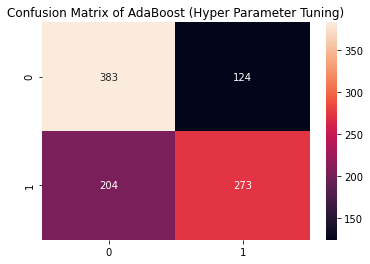

In [39]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of AdaBoost (Hyper Parameter Tuning)")

In [40]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       507
           1       0.69      0.57      0.62       477

    accuracy                           0.67       984
   macro avg       0.67      0.66      0.66       984
weighted avg       0.67      0.67      0.66       984



AUC: 0.719


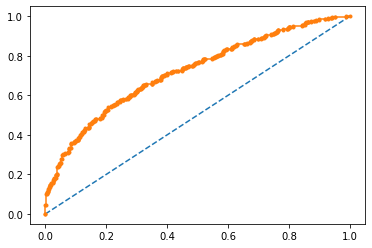

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = log_reg.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [43]:
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'C':[0.001,0.01,0.1,1,10,100,1000]}]

grid = GridSearchCV(
    estimator= LogisticRegression(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [44]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'C': 0.01}
LogisticRegression(C=0.01)

Score on Test Data:  0.6636178861788617


In [45]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'C': 0.01}
LogisticRegression(C=0.01)

Score on Test Data:  0.6636178861788617


In [46]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(C=0.01)

logistic.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [47]:
pred_train = logistic.predict(X_train)
pred_test = logistic.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6598881545500762
Testing Accuracy Score : 0.6636178861788617


In [49]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression(Hyper Parameter Tuning)')

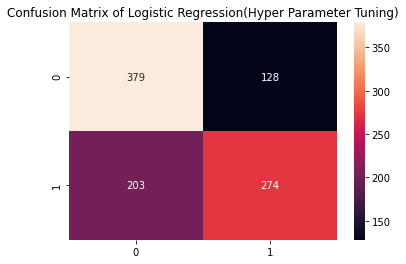

In [50]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of Logistic Regression(Hyper Parameter Tuning)")

In [51]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       507
           1       0.68      0.57      0.62       477

    accuracy                           0.66       984
   macro avg       0.67      0.66      0.66       984
weighted avg       0.67      0.66      0.66       984



AUC: 0.719


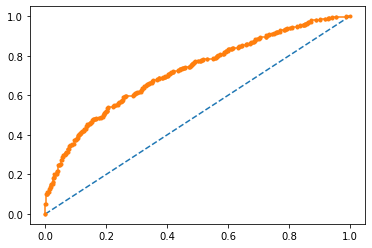

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = logistic.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

In [53]:
# ---------------------------------------------------------------------------------------------------------

## Model Building - SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
6. Compare the perormance of all the models

## SVM

In [54]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train,y_train)

SVC(probability=True)

In [55]:
pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6995424504321301
Testing Accuracy Score : 0.6626016260162602


In [57]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of SVC Classifier')

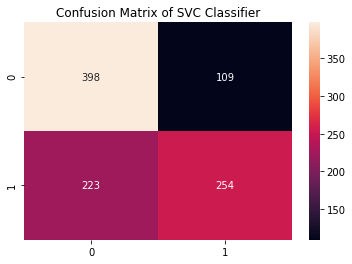

In [58]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of SVC Classifier")

In [59]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       507
           1       0.70      0.53      0.60       477

    accuracy                           0.66       984
   macro avg       0.67      0.66      0.66       984
weighted avg       0.67      0.66      0.66       984



AUC: 0.724


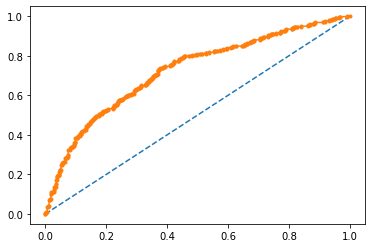

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = svc.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.587 total time=   5.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.560 total time=   4.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.582 total time=   4.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.578 total time=   4.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   5.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.665 total time=   4.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.680 total time=   4.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   4.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.672 total time=   4.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.681 total time=   4.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.658 total time=   4.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.633 total time=   7.6s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.616 total time=   7.4s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.610 total time=   7.3s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.604 total time=   7.4s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.611 total time=  41.9s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.606 total time=  45.9s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.597 total time=  43.2s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.630 total time=  48.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.648 total time=  46.9s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.661 total time=  11.3s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.685 total time=  11.3s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.685 total time=  11.3s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [62]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1, probability=True)

Score on Test Data:  0.6615853658536586


In [63]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.589617,0.024619,0.429460,0.005555,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.587039,0.560356,0.581957,0.578145,0.613232,0.584146,0.017095,24
1,3.811692,0.027389,0.339435,0.004496,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.664549,0.679797,0.686150,0.672173,0.680662,0.676666,0.007520,2
2,4.057294,0.025579,0.367629,0.006617,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.658196,0.659466,0.677255,0.659466,0.670483,0.664973,0.007587,12
3,4.558881,0.035113,0.431615,0.002968,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.622618,0.625159,0.636595,0.630241,0.617048,0.626332,0.006663,19
4,4.606261,0.121430,0.440274,0.010689,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.504447,0.504447,0.503177,0.503177,0.503817,0.503813,0.000568,25


In [64]:
from sklearn.svm import SVC

svc = SVC(C=1000, gamma=0.01, probability=True, kernel='rbf')
svc.fit(X_train,y_train)

SVC(C=1000, gamma=0.01, probability=True)

In [65]:
pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6982714794102695
Testing Accuracy Score : 0.6554878048780488


In [67]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of SVC (Hyper Parameter Tuning)')

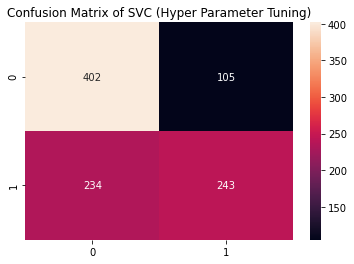

In [68]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of SVC (Hyper Parameter Tuning)")

In [69]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       507
           1       0.70      0.51      0.59       477

    accuracy                           0.66       984
   macro avg       0.67      0.65      0.65       984
weighted avg       0.66      0.66      0.65       984



AUC: 0.726


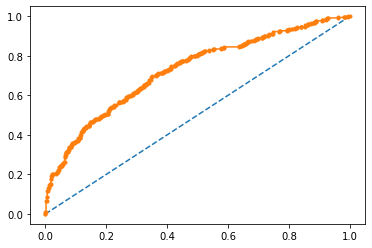

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = svc.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

## KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.8101169293340111
Testing Accuracy Score : 0.6209349593495935


In [74]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of KNN Classifier')

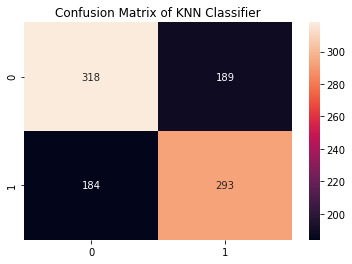

In [75]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of KNN Classifier")

In [76]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       507
           1       0.61      0.61      0.61       477

    accuracy                           0.62       984
   macro avg       0.62      0.62      0.62       984
weighted avg       0.62      0.62      0.62       984



AUC: 0.652


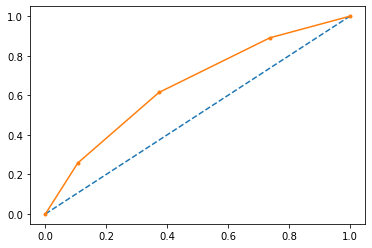

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = knn.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 1, cv=5, n_jobs = -1)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [79]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=15, weights='distance')

Score on Test Data:  0.6565040650406504


In [80]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011812,0.003661,0.076314,0.003989,minkowski,5,uniform,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.627700,0.665820,0.625159,0.630241,0.633588,0.636502,0.014922,31
1,0.011435,0.003967,0.040512,0.000076,minkowski,5,distance,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.622618,0.659466,0.622618,0.635324,0.637405,0.635486,0.013490,35
2,0.011318,0.003956,0.078249,0.003643,minkowski,7,uniform,"{'metric': 'minkowski', 'n_neighbors': 7, 'wei...",0.613723,0.665820,0.640407,0.632783,0.641221,0.638791,0.016754,27
3,0.013003,0.003961,0.038909,0.003243,minkowski,7,distance,"{'metric': 'minkowski', 'n_neighbors': 7, 'wei...",0.612452,0.656925,0.634053,0.627700,0.651399,0.636506,0.016130,29
4,0.012926,0.003977,0.082792,0.003352,minkowski,9,uniform,"{'metric': 'minkowski', 'n_neighbors': 9, 'wei...",0.618806,0.660737,0.655654,0.649301,0.646310,0.646162,0.014566,21


In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform', metric = 'manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [82]:
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.7071682765632944
Testing Accuracy Score : 0.6544715447154471


In [84]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of KNN Clasifier (Hyper Parameter Tuning)')

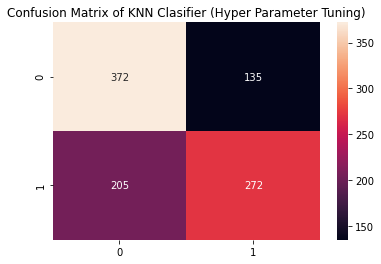

In [85]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of KNN Clasifier (Hyper Parameter Tuning)")

In [86]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.64      0.73      0.69       507
           1       0.67      0.57      0.62       477

    accuracy                           0.65       984
   macro avg       0.66      0.65      0.65       984
weighted avg       0.66      0.65      0.65       984



AUC: 0.699


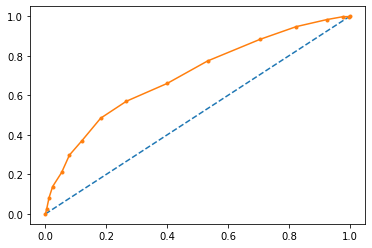

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = knn.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

## Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 1.0
Testing Accuracy Score : 0.5934959349593496


In [91]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Classifier')

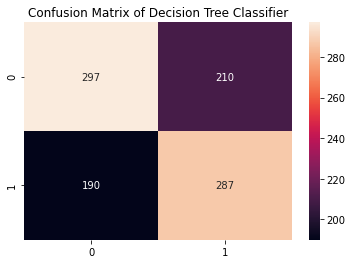

In [92]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of Decision Tree Classifier")

In [93]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       507
           1       0.58      0.60      0.59       477

    accuracy                           0.59       984
   macro avg       0.59      0.59      0.59       984
weighted avg       0.59      0.59      0.59       984



AUC: 0.594


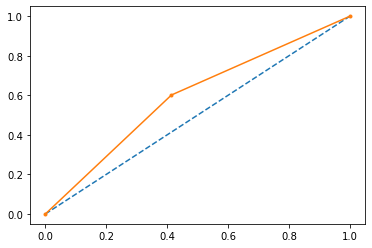

In [94]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = tree.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning

In [96]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth':[i for i in range(1,10)]}]

grid= GridSearchCV(
    estimator= DecisionTreeClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [97]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()


Best parameters set found on train set:
{'max_depth': 6}
DecisionTreeClassifier(max_depth=6)



In [98]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006400,0.003200,0.001600,0.003200,1,{'max_depth': 1},0.611182,0.649301,0.631512,0.630241,...,0.628366,0.012837,9,0.641881,0.631713,0.635208,0.629171,0.631512,0.633897,0.004433
1,0.007999,0.000002,0.000000,0.000000,2,{'max_depth': 2},0.654384,0.679797,0.681067,0.659466,...,0.668785,0.010645,4,0.678424,0.671433,0.679059,0.673022,0.676620,0.675712,0.002998
2,0.009598,0.003199,0.000000,0.000000,3,{'max_depth': 3},0.654384,0.679797,0.681067,0.659466,...,0.667767,0.010797,5,0.678424,0.672386,0.679059,0.673975,0.676938,0.676157,0.002575
3,0.012796,0.003922,0.001603,0.003206,4,{'max_depth': 4},0.668361,0.673443,0.682338,0.669632,...,0.672343,0.005361,3,0.687639,0.687003,0.684779,0.678424,0.686785,0.684926,0.003389
4,0.011221,0.003900,0.001604,0.003207,5,{'max_depth': 5},0.668361,0.681067,0.679797,0.679797,...,0.676155,0.005114,2,0.697172,0.694630,0.691134,0.690499,0.691550,0.692997,0.002526


In [99]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [100]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6995424504321301
Testing Accuracy Score : 0.665650406504065


In [102]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of Decision Tree (Hyper Parameter Tuning)')

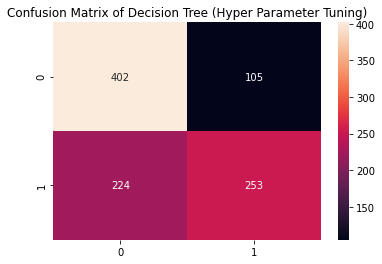

In [103]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of Decision Tree (Hyper Parameter Tuning)")

In [104]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       507
           1       0.71      0.53      0.61       477

    accuracy                           0.67       984
   macro avg       0.67      0.66      0.66       984
weighted avg       0.67      0.67      0.66       984



AUC: 0.720


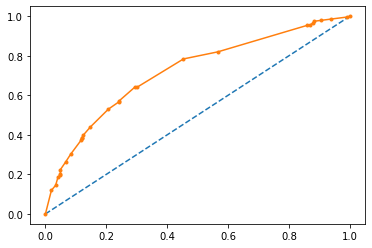

In [105]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = tree.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

> Ensemble Technique

## Bagging - RandomForestClassifier

In [107]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [108]:
pred_train = rfc.predict(X_train)
pred_test = rfc.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 1.0
Testing Accuracy Score : 0.6697154471544715


In [110]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of Random Forest Classifier')

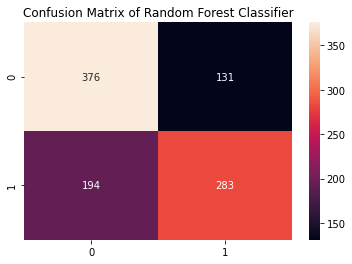

In [111]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of Random Forest Classifier")

In [112]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       507
           1       0.68      0.59      0.64       477

    accuracy                           0.67       984
   macro avg       0.67      0.67      0.67       984
weighted avg       0.67      0.67      0.67       984



AUC: 0.727


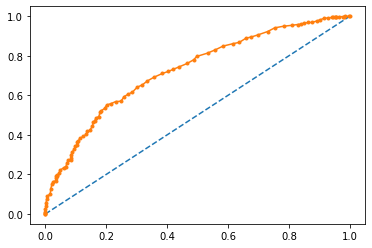

In [113]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = rfc.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning`

In [114]:
tuned_parameters = [{'max_depth':[i for i in range(1,20)]}]

rfcc = GridSearchCV(
    estimator= RandomForestClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

rfcc.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [115]:
print("Best parameters set found on train set:")
print(rfcc.best_params_)
print(rfcc.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'max_depth': 8}
RandomForestClassifier(max_depth=8)

Score on Test Data:  0.6666666666666666


In [116]:
cv_results = pd.DataFrame(rfcc.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.313221,0.021647,0.024265,0.000077,1,{'max_depth': 1},0.654384,0.670902,0.678526,0.662008,...,0.667006,0.008210,18,0.676200,0.665713,0.672704,0.674293,0.679161,0.673614,0.004498
1,0.342679,0.010955,0.022851,0.003292,2,{'max_depth': 2},0.660737,0.679797,0.682338,0.678526,...,0.675140,0.007657,11,0.678742,0.676517,0.680966,0.678424,0.677891,0.678508,0.001445
2,0.377435,0.003769,0.024540,0.000144,3,{'max_depth': 3},0.667090,0.678526,0.683609,0.669632,...,0.674886,0.005970,12,0.687321,0.680648,0.682555,0.685415,0.682338,0.683655,0.002388
3,0.421493,0.005094,0.026061,0.003357,4,{'max_depth': 4},0.668361,0.681067,0.687421,0.677255,...,0.677426,0.006553,9,0.691134,0.687321,0.686368,0.688592,0.691868,0.689057,0.002130
4,0.462627,0.003408,0.024389,0.000093,5,{'max_depth': 5},0.667090,0.677255,0.692503,0.673443,...,0.679209,0.008983,7,0.703209,0.699078,0.696854,0.699396,0.701080,0.699924,0.002124


In [117]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=9)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=9)

In [118]:
pred_train = rfc.predict(X_train)
pred_test = rfc.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.7783426537874937
Testing Accuracy Score : 0.6727642276422764


In [120]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of XGBoost (Hyper Parameter Tuning)")

SyntaxError: invalid syntax (<ipython-input-120-f8fd40a21910>, line 2)

In [121]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71       507
           1       0.71      0.55      0.62       477

    accuracy                           0.67       984
   macro avg       0.68      0.67      0.67       984
weighted avg       0.68      0.67      0.67       984



AUC: 0.748


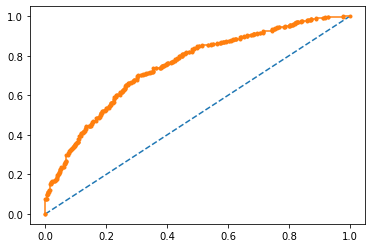

In [122]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = rfc.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

## Boosting - XGBoost with hyperparameter tunning

In [123]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [124]:
pred_train = model_xgb.predict(X_train)
pred_test = model_xgb.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.9641586171835282
Testing Accuracy Score : 0.6565040650406504


In [126]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of XGBoost Classifier')

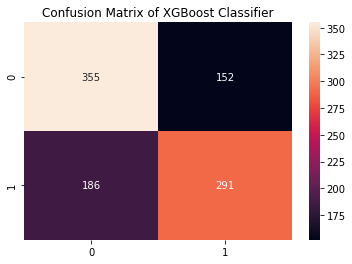

In [127]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of XGBoost Classifier")

In [128]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       507
           1       0.66      0.61      0.63       477

    accuracy                           0.66       984
   macro avg       0.66      0.66      0.66       984
weighted avg       0.66      0.66      0.66       984



AUC: 0.725


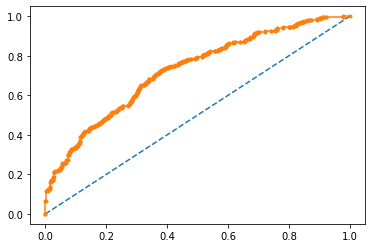

In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = model_xgb.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning

In [130]:
tuned_parameters = [{'max_depth':[i for i in range(1,10)]}]

grid = GridSearchCV(
    estimator= XGBClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [131]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'max_depth': 2}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Score on Test Data:  0.693089430894309


In [132]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.152515,0.044982,0.004824,0.003939,1,{'max_depth': 1},0.668361,0.687421,0.698856,0.668361,...,0.682259,0.012040,2,0.696219,0.698761,0.690181,0.693994,0.693456,0.694522,0.002867
1,0.176928,0.009606,0.004824,0.003939,2,{'max_depth': 2},0.669632,0.695044,0.693774,0.678526,...,0.688108,0.012266,1,0.740070,0.733079,0.725771,0.730537,0.729352,0.731762,0.004774
2,0.218033,0.003186,0.004899,0.004000,3,{'max_depth': 3},0.649301,0.683609,0.665820,0.678526,...,0.675146,0.016626,3,0.812520,0.797585,0.789005,0.789641,0.786531,0.795056,0.009487
3,0.272708,0.006187,0.004837,0.003950,4,{'max_depth': 4},0.634053,0.682338,0.651842,0.673443,...,0.665231,0.019400,4,0.870035,0.871624,0.880839,0.863680,0.863405,0.869917,0.006380
4,0.322819,0.003167,0.006575,0.003288,5,{'max_depth': 5},0.639136,0.682338,0.642948,0.670902,...,0.662434,0.017878,5,0.943438,0.939625,0.943120,0.932634,0.942186,0.940201,0.004013


In [133]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

model_xgb = XGBClassifier(max_depth = 1)

model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [134]:
pred_train = model_xgb.predict(X_train)
pred_test = model_xgb.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6914082358922217
Testing Accuracy Score : 0.6758130081300813


In [136]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of XGBoost (Hyper Parameter Tuning)')

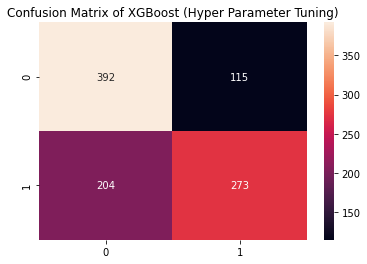

In [137]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of XGBoost (Hyper Parameter Tuning)")

In [138]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       507
           1       0.70      0.57      0.63       477

    accuracy                           0.68       984
   macro avg       0.68      0.67      0.67       984
weighted avg       0.68      0.68      0.67       984



AUC: 0.751


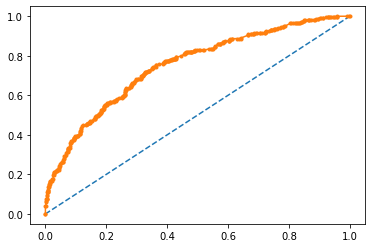

In [139]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = model_xgb.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

## Boosting - AdaBoost with hyperparameter tunning

In [140]:
from sklearn.ensemble import AdaBoostClassifier
ada_cls = AdaBoostClassifier()
ada_cls.fit(X_train,y_train)

AdaBoostClassifier()

In [141]:
pred_train = ada_cls.predict(X_train)
pred_test = ada_cls.predict(X_test)

In [142]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6954753431621759
Testing Accuracy Score : 0.6778455284552846


In [143]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of AdaBoost Classifier')

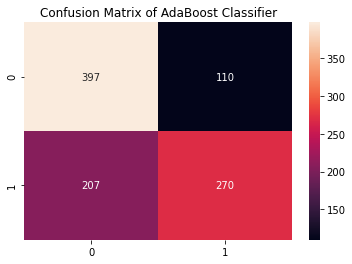

In [144]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of AdaBoost Classifier")

In [145]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71       507
           1       0.71      0.57      0.63       477

    accuracy                           0.68       984
   macro avg       0.68      0.67      0.67       984
weighted avg       0.68      0.68      0.67       984



AUC: 0.737


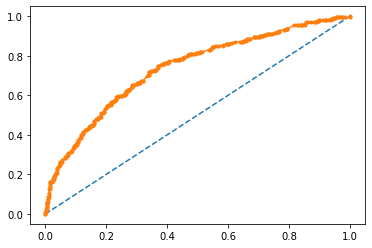

In [146]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = ada_cls.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning

In [147]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30]
}
grid = GridSearchCV(AdaBoostClassifier(random_state = 5), parameters, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=5), n_jobs=-1,
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20, 30]},
             verbose=1)

In [148]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'n_estimators': 20}
AdaBoostClassifier(n_estimators=20, random_state=5)

Score on Test Data:  0.6727642276422764


In [149]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008001,0.000002,0.000000,0.000000,1,{'n_estimators': 1},0.611182,0.649301,0.631512,0.630241,0.619593,0.628366,0.012837,14
1,0.019199,0.006400,0.001600,0.003200,2,{'n_estimators': 2},0.654384,0.682338,0.673443,0.658196,0.659033,0.665479,0.010634,13
2,0.027196,0.013948,0.004831,0.003944,3,{'n_estimators': 3},0.654384,0.682338,0.674714,0.660737,0.659033,0.666241,0.010524,12
3,0.035344,0.010788,0.001599,0.003199,4,{'n_estimators': 4},0.662008,0.684879,0.675985,0.663278,0.659033,0.669037,0.009817,8
4,0.030879,0.003147,0.003257,0.003989,5,{'n_estimators': 5},0.653113,0.684879,0.675985,0.663278,0.664122,0.668276,0.011020,10


In [150]:
from sklearn.ensemble import AdaBoostClassifier
ada_cls = AdaBoostClassifier(n_estimators = 12)
ada_cls.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=12)

In [151]:
pred_train = ada_cls.predict(X_train)
pred_test = ada_cls.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6825114387391967
Testing Accuracy Score : 0.665650406504065


In [153]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of AdaBoost (Hyper Parameter Tuning)')

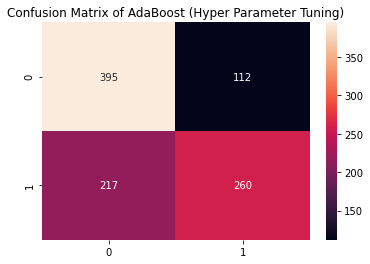

In [154]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of AdaBoost (Hyper Parameter Tuning)")

In [155]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       507
           1       0.70      0.55      0.61       477

    accuracy                           0.67       984
   macro avg       0.67      0.66      0.66       984
weighted avg       0.67      0.67      0.66       984



AUC: 0.722


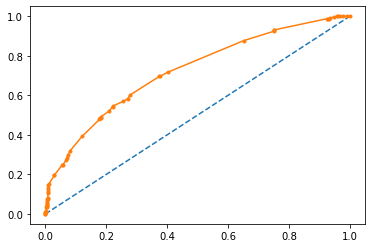

In [156]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = ada_cls.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

# All model score with Feature Engineering

In [157]:
algo=[log_reg,svc,knn,tree,rfc,model_xgb,ada_cls]

In [160]:
model=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algo)):
    algo[i].fit(X_train,y_train)
    accuracy_train.append(algo[i].score(X_train,y_train))
    accuracy_test.append(algo[i].score(X_test,y_test))
    model.append(algo[i])

In [161]:
mod=pd.DataFrame([model,accuracy_train,accuracy_test]).T
mod.columns=['model','score_train','score_test']
mod

,model,score_train,score_test
0,LogisticRegression(),0.658109,0.666667
1,"SVC(C=1000, gamma=0.01, probability=True)",0.698271,0.655488
2,"KNeighborsClassifier(metric='manhattan', n_nei...",0.707168,0.654472
3,DecisionTreeClassifier(max_depth=6),0.699542,0.66565
4,"(DecisionTreeClassifier(max_depth=9, max_featu...",0.781139,0.67378
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.691408,0.675813
6,"(DecisionTreeClassifier(max_depth=1, random_st...",0.682511,0.66565


> Conclusion:- Out of all the models XGB Classifier perfomed the best.
- There is not much difference between the results of model with feature engineering or without feature engineering.